In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [112]:
# This file contains all the main external libs we'll use
import fastai
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

import torch.nn as nn 
import torch 
import numpy 
%matplotlib inline

from torch.autograd import Variable
from torchvision import models
from fastai import conv_learner
import numpy as np
import matplotlib.pyplot as plt
import skimage.transform

In [113]:
def rowskipper(x):
    if x == 0:
        return False
    else:
        return random.randint(0, 10) < 5

In [114]:
train_3000 = pd.read_csv('../results/data_3000x3000_train_resnet50_layer9.csv', skiprows=lambda x: rowskipper(x))
valid_3000 = pd.read_csv('../results/data_3000x3000_valid_resnet50_layer9.csv', skiprows=lambda x: rowskipper(x))

train_1000 = pd.read_csv('../results/data_1000x1000_train_resnet50_layer9.csv', skiprows=lambda x: rowskipper(x))
valid_1000 = pd.read_csv('../results/data_1000x1000_valid_resnet50_layer9.csv', skiprows=lambda x: rowskipper(x))

In [115]:
# train_1000 = train_1000
# valid_1000 = valid_1000

# train_3000 = train_3000
# valid_3000 = valid_3000


In [116]:
train_3000

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,4088,4089,4090,4091,4092,4093,4094,4095,fname,target
0,0,2.803550,4.058509,2.598329,5.042360,5.509033,3.823481,3.517623,2.619440,3.802115,...,0.447492,0.382968,0.416985,0.193343,0.414824,0.349305,0.423404,0.338111,train/Celiac/C04-18_03__1500_0_0.jpg,0
1,1,3.162002,5.035430,3.992079,4.542854,3.266301,3.963581,3.100580,2.957502,3.346369,...,0.432694,0.384373,0.435490,0.184526,0.448868,0.324862,0.471283,0.326968,train/Celiac/C16-77_04__4500_3000_1.jpg,0
2,2,3.264968,3.745971,3.039257,4.729208,5.144976,5.622829,4.391372,4.312764,3.814106,...,0.441782,0.360689,0.450734,0.192931,0.414817,0.337610,0.464122,0.309182,train/Celiac/C12-64_01b__13500_3000_1.jpg,0
3,3,2.698981,3.608355,4.257896,3.502722,4.389866,6.125913,3.935047,3.877458,3.271955,...,0.449568,0.379349,0.450427,0.175715,0.421072,0.360951,0.443982,0.314134,train/Celiac/C17-81_04__19426_7500_0.jpg,0
4,5,4.117842,3.558415,3.613600,3.070492,5.723140,4.196073,3.246083,4.573276,3.437259,...,0.440047,0.366978,0.466528,0.192766,0.433698,0.375579,0.472107,0.318218,train/Celiac/C04-18_03__4500_7397_1.jpg,0
5,6,3.162002,5.035430,3.992079,4.542854,3.266301,3.963581,3.100580,2.957502,3.346369,...,0.432694,0.384373,0.435490,0.184526,0.448868,0.324862,0.471283,0.326968,train/Celiac/C16-77_04__4500_3000_0.jpg,0
6,7,2.624983,5.867720,2.585523,3.692223,4.630591,5.564481,2.606492,3.154169,3.416204,...,0.445022,0.386476,0.450306,0.188948,0.400690,0.330429,0.486487,0.349993,train/Celiac/C04-19_01__3000_3000_1.jpg,0
7,9,3.691777,4.855396,2.921087,4.335302,4.688369,4.254558,4.294879,4.384098,3.610675,...,0.442327,0.388498,0.451955,0.189200,0.425758,0.316896,0.459939,0.341887,train/Celiac/C15-75_02__9000_3000_0.jpg,0
8,10,2.472731,3.237711,3.291296,2.987688,3.261114,6.909636,2.635030,4.483885,3.778557,...,0.444441,0.419453,0.464224,0.185489,0.465899,0.325617,0.460395,0.331490,train/Celiac/C10-49_03__7500_5345_0.jpg,0
9,11,2.949974,4.770578,3.299324,4.464226,3.328729,3.897117,4.397144,4.367191,3.776842,...,0.441289,0.372780,0.453419,0.179976,0.441821,0.357127,0.461183,0.320129,train/Celiac/C07-35_04__3000_4500_1.jpg,0


In [117]:
train_3000['source_fname'] = train_3000.fname.str.split('__').str[0]
train_1000['source_fname'] = train_1000.fname.str.split('__').str[0]

valid_3000['source_fname'] = valid_3000.fname.str.split('__').str[0]
valid_1000['source_fname'] = valid_1000.fname.str.split('__').str[0]

In [118]:
train_3000['source_fname'] = train_3000.fname.apply(lambda x: '_'.join(x.split('_')[:-1]).replace('__', '_'))
valid_3000['source_fname'] = valid_3000.fname.apply(lambda x: '_'.join(x.split('_')[:-1]).replace('__', '_'))

In [119]:
train_1000['source_fname'] = train_1000.fname.apply(lambda x: '_'.join(x.split('__')[:-1]))
valid_1000['source_fname'] = valid_1000.fname.apply(lambda x: '_'.join(x.split('__')[:-1]))

In [120]:
df_train = pd.merge(left=train_3000, right=train_1000, on='source_fname', how='inner')
df_valid = pd.merge(left=valid_3000, right=valid_1000, on='source_fname', how='inner')

In [121]:
train_1000 =0 
valid_1000 = 0

train_3000 = 0
valid_3000 = 0
import gc
gc.collect()

68

In [122]:
# df_train = df_train.sample(frac=0.2).reset_index(drop=True)
# df_valid = df_valid.sample(frac=0.2).reset_index(drop=True)

In [123]:
import gc
gc.collect()

0

In [124]:
from fastai.structured import *
from fastai.column_data import *
np.set_printoptions(threshold=50, edgeitems=20)

import warnings
warnings.filterwarnings('ignore')

In [125]:
cols = list(df_train.columns)

In [126]:
cols.remove('Unnamed: 0_x')
cols.remove('Unnamed: 0_y')
cols.remove('fname_x')
cols.remove('fname_y')
cols.remove('source_fname')
# cols.remove('source_fname_y')
cols.remove('target_x')
cols.remove('target_y')

In [127]:
num_cols = cols

In [128]:
train_target = df_train['target_x']
valid_target = df_valid['target_x']

In [129]:
# Converting numeric columns to float
for col in num_cols:
    df_train[col] = df_train[col].astype(float)
    df_valid[col] = df_valid[col].astype(float)

In [130]:
# for v in num_cols:
#     df_train[v] = df_train[v].fillna(0).astype('float32')
#     df_valid[v] = df_valid[v].fillna(0).astype('float32')

In [131]:
df_train['target'] = train_target
df_valid['target'] = valid_target

In [132]:
df_train = df_train[num_cols + ['target']]
df_valid = df_valid[num_cols + ['target']]

In [133]:
# df = df.sample(frac=1).reset_index(drop=True)

In [134]:
val_idx = list(range(0, 2000))

In [135]:
# Using fast.ai function to prcess the dataframe for the neural network
df, y, nas, mapper = proc_df(df_train, 'target', do_scale=True)

In [136]:
nas

{}

In [137]:
df_test, y_target, nas, mapper = proc_df(df_valid, 'target', do_scale=True,
                                  mapper=mapper, na_dict=nas)

In [138]:
# Using fast.ai modules to initialize the model for training
PATH='data/' # UNNECESSARY
md = ColumnarModelData.from_data_frame(PATH, val_idx, df, y.astype(np.float32), cat_flds=[], bs=128,
                                       test_df=df_test)

In [192]:
y_range = (0, 2)
# Defining the neural network architecture
m = md.get_learner([], len(df.columns),
                   0.04, 1, [4096,2048, 512], [0.001, 0.01, 0.01], y_range=y_range)
m.summary()

OrderedDict([('BatchNorm1d-1',
              OrderedDict([('input_shape', [-1, 8192]),
                           ('output_shape', [-1, 8192]),
                           ('trainable', True),
                           ('nb_params', tensor(16384))])),
             ('Linear-2',
              OrderedDict([('input_shape', [-1, 8192]),
                           ('output_shape', [-1, 4096]),
                           ('trainable', True),
                           ('nb_params', tensor(33558528))])),
             ('Dropout-3',
              OrderedDict([('input_shape', [-1, 4096]),
                           ('output_shape', [-1, 4096]),
                           ('nb_params', 0)])),
             ('Linear-4',
              OrderedDict([('input_shape', [-1, 4096]),
                           ('output_shape', [-1, 2048]),
                           ('trainable', True),
                           ('nb_params', tensor(8390656))])),
             ('Dropout-5',
              OrderedDict([('input

In [205]:
m.model

MixedInputModel(
  (embs): ModuleList()
  (lins): ModuleList(
    (0): Linear(in_features=8192, out_features=4096, bias=True)
    (1): Linear(in_features=4096, out_features=2048, bias=True)
    (2): Linear(in_features=2048, out_features=512, bias=True)
  )
  (bns): ModuleList(
    (0): BatchNorm1d(4096, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (1): BatchNorm1d(2048, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (outp): Linear(in_features=512, out_features=1, bias=True)
  (emb_drop): Dropout(p=0.04)
  (drops): ModuleList(
    (0): Dropout(p=0.001)
    (1): Dropout(p=0.01)
    (2): Dropout(p=0.01)
  )
  (bn): BatchNorm1d(8192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

In [193]:
# Finding an optimal learning rate
m.lr_find()

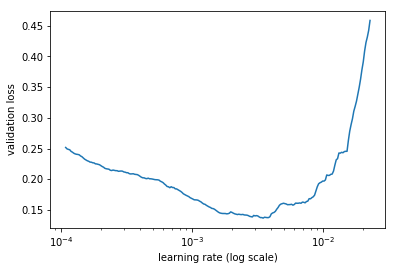

In [194]:
m.sched.plot(100)

In [195]:
lr = (1e-4 + 1e-3)/2
m.fit(lr, 2)

epoch      trn_loss   val_loss                                
    0      0.021845   0.522145  
    1      0.014052   0.58695                                  


[0.5869501333236694]

In [196]:
y=m.predict(True)

In [197]:
np.sum(y.T[0] - y_target)

1570.6613337885287

In [198]:
preds =  [np.round(x) for x in y]

In [199]:
from sklearn.metrics import precision_score

In [202]:
precision_score(preds, y_target, average='macro')

0.7507653921828776

In [203]:
np.unique(preds)

array([0., 1., 2.], dtype=float32)